In [1]:
import os
import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
from collections import defaultdict
from gelgenie.segmentation.helper_functions.general_functions import extract_image_names_from_folder
import seaborn as sns

In [2]:
def channel_converter(image, n_channels):
    # Converts to desired number of channels
    if n_channels == 1:  # Target input: 1 channel
        if image.shape[-1] == 3:  # Actual input: 3 channels
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        elif image.shape[-1] == 4:  # Actual input: 4 channels
            image = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)
        # No change required for already grayscale images
    elif n_channels == 3:  # Target input: 3 channels
        if image.shape[-1] == 4:  # Actual input: 4 channels
            image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
        elif image.shape[-1] != 3:  # Actual input: 1 channels
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return image


# main dataset
main_folder = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/data/processed_gels/maximal_set'
input_groups = ['matthew_gels', 'matthew_gels_2', 'nathan_gels', 'quantitation_ladder_gels', 'lsdb_gels']
supp_group_1 = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/data/processed_gels/maximal_set/stella_gels'
supp_group_2 = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/data/gels_for_paper_revisions/assembled_set'
image_subgroups = ['images', 'val_images', 'test_images']
mask_subgroups = ['masks', 'val_masks', 'test_masks']
all_images = []
all_masks = []
for group in input_groups:
        for i,m in zip(image_subgroups, mask_subgroups):
            images = extract_image_names_from_folder(os.path.join(main_folder, group, i))
            masks = extract_image_names_from_folder(os.path.join(main_folder, group, m))
            all_images.extend(images)
            all_masks.extend(masks)
s1_images = []
s1_masks = []
for i,m in zip(image_subgroups, mask_subgroups):
    images = extract_image_names_from_folder(os.path.join(supp_group_1, i))
    masks = extract_image_names_from_folder(os.path.join(supp_group_1, m))
    s1_images.extend(images)
    s1_masks.extend(masks)

s2_images = extract_image_names_from_folder(os.path.join(supp_group_2, 'images'))
s2_masks = extract_image_names_from_folder(os.path.join(supp_group_2, 'masks'))


In [3]:
pixel_average_by_dtype = defaultdict(list)
all_image_data = defaultdict(list)

for im, mask in tqdm(zip(all_images, all_masks), total=len(all_images)):
    image = channel_converter(imageio.v2.imread(im), 1)
    mask = imageio.v2.imread(mask)
    pixel_average_by_dtype[str(image.dtype) + '-bands'].append(np.mean(image[mask==1]))
    pixel_average_by_dtype[str(image.dtype) + '-background'].append(np.mean(image[mask==0]))
    pixel_average_by_dtype[str(image.dtype) + '-SNR'].append(np.mean(image[mask==1]) - np.mean(image[mask==0])/np.std(image[mask==0]))
    pixel_average_by_dtype[str(image.dtype) + '-contrast'].append(np.mean(image[mask==1])/np.mean(image[mask==0]))
    norm_foregound = np.mean(image[mask==1]) /255 if image.dtype == 'uint8' else np.mean(image[mask==1])/65535
    norm_background = np.mean(image[mask==0]) /255 if image.dtype == 'uint8' else np.mean(image[mask==0])/65535

    all_image_data['Average Intensity of Band Pixels in an Image'].append(norm_foregound)
    all_image_data['Average Intensity of Non-Band Pixels in an Image'].append(norm_background)
    all_image_data['Difference Between Average Band Intensity and Average Non-Band Intensity in an Image'].append(norm_foregound - norm_background)

s1_image_data = defaultdict(list)
for im, mask in tqdm(zip(s1_images, s1_masks), total=len(s1_images)):
    image = channel_converter(imageio.v2.imread(im), 1)
    mask = imageio.v2.imread(mask)
    norm_foregound = np.mean(image[mask==1]) /255 if image.dtype == 'uint8' else np.mean(image[mask==1])/65535
    norm_background = np.mean(image[mask==0]) /255 if image.dtype == 'uint8' else np.mean(image[mask==0])/65535
    s1_image_data['Average Intensity of Band Pixels in an Image'].append(norm_foregound)
    s1_image_data['Average Intensity of Non-Band Pixels in an Image'].append(norm_background)
    s1_image_data['Difference Between Average Band Intensity and Average Non-Band Intensity in an Image'].append(norm_foregound - norm_background)

s2_image_data = defaultdict(list)
for im, mask in tqdm(zip(s2_images, s2_masks), total=len(s2_images)):
    image = channel_converter(imageio.v2.imread(im), 1)
    mask = imageio.v2.imread(mask)
    norm_foregound = np.mean(image[mask==1]) /255 if image.dtype == 'uint8' else np.mean(image[mask==1])/65535
    norm_background = np.mean(image[mask==0]) /255 if image.dtype == 'uint8' else np.mean(image[mask==0])/65535
    s2_image_data['Average Intensity of Band Pixels in an Image'].append(norm_foregound)
    s2_image_data['Average Intensity of Non-Band Pixels in an Image'].append(norm_background)
    s2_image_data['Difference Between Average Band Intensity and Average Non-Band Intensity in an Image'].append(norm_foregound - norm_background)


  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 1807 @7606828> invalid value offset 7605009')
<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 1808 @7606840> invalid value offset 7606069')
<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 1807 @7606840> invalid value offset 7605009')
<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 1808 @7606852> invalid value offset 7606069')
<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 1807 @7606854> invalid value offset 7605009')
<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 1808 @7606866> invalid value offset 7606069')
<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 1807 @7606835> invalid value offset 7605009')
<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 1808 @7606847> invalid value offset 7606069')
<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 1807 @7606830> invalid value offset 7605009')
<TiffTag.fromfile> raised TiffFileError('<tifffile.Tiff

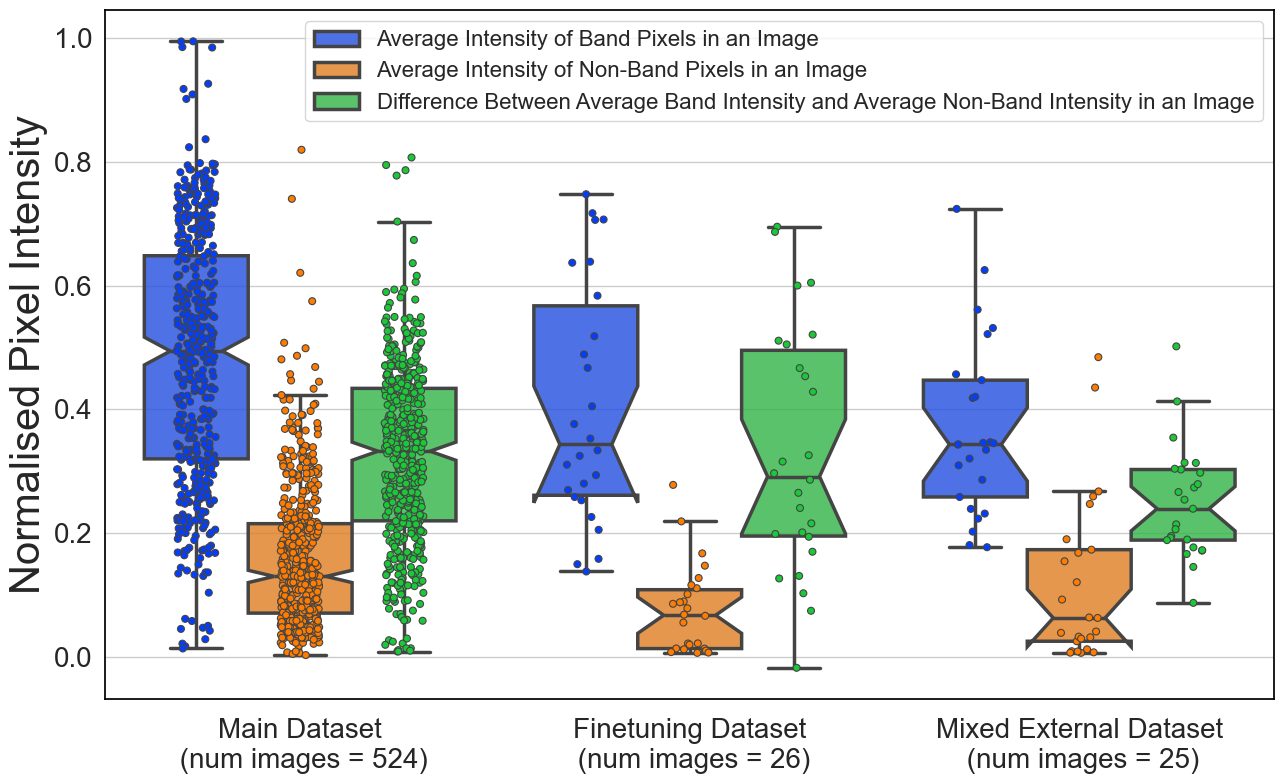

In [6]:
main_band_df = pd.DataFrame(all_image_data)
s1_df = pd.DataFrame(s1_image_data)
s2_df = pd.DataFrame(s2_image_data)

main_band_df['Dataset'] = 'Main Dataset'
s1_df['Dataset'] = 'Finetuning Dataset'
s2_df['Dataset'] = 'Mixed External Dataset'

combined_df = pd.concat([main_band_df, s1_df, s2_df], ignore_index=True)

# Melt the DataFrame for Seaborn boxplot:
all_combined_melt = pd.melt(combined_df, id_vars=['Dataset'], var_name='Metric', value_name='value')

sns.set(style="whitegrid")
plt.figure(figsize=(13, 8))
ax = sns.boxplot(x='Dataset', y='value', hue='Metric', data=all_combined_melt, showfliers=False,
                 notch=True, palette='bright', linewidth=2.5)
sns.stripplot(x='Dataset', y='value', hue='Metric', data=all_combined_melt, jitter=0.15, legend=False,  alpha=1.0, marker="o", linewidth=0.8,dodge=True,
                  palette='bright')
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

plt.xlabel('', fontsize=30, labelpad=15)
plt.ylabel('Normalised Pixel Intensity', fontsize=30)
plt.yticks(fontsize=20)
ax.tick_params(axis='x', labelsize=20, size=10)
ax.set_xticks(ax.get_xticks())  # just to silence annoying warning
ax.set_xticklabels(['Main Dataset\n (num images = %s)' % len(main_band_df), 'Finetuning Dataset\n (num images = %s)' % len(s1_df),
                    'Mixed External Dataset\n (num images = %s)' % len(s2_df)])
ax.legend(fontsize=16)
plt.tight_layout()
plt.savefig('/Users/matt/Desktop/datasets_background_check.pdf')

combined_df.to_excel('/Users/matt/Desktop/figure_s6_source_data.xlsx', index=False)
pass

### Other Tests

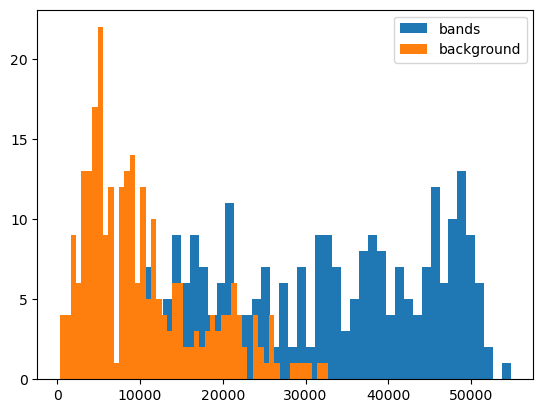

In [36]:

plt.hist(pixel_average_by_dtype['uint16-bands'], bins=50, label='bands')
plt.hist(pixel_average_by_dtype['uint16-background'], bins=50, label='background')
plt.legend()
pass

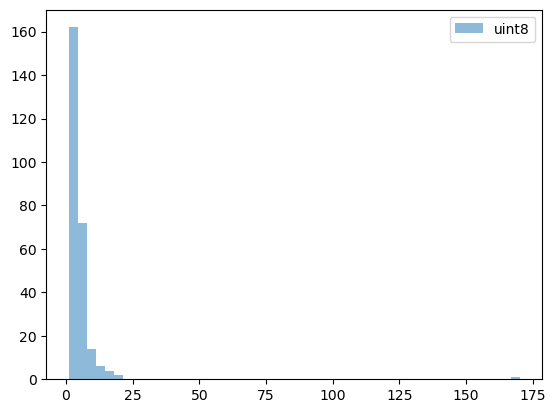

In [41]:
plt.hist(pixel_average_by_dtype['uint8-contrast'], bins=50, alpha=0.5, label='uint8')
# plt.hist(pixel_average_by_dtype['uint16-contrast'], bins=50, alpha=0.5, label='uint16')
plt.legend()
pass

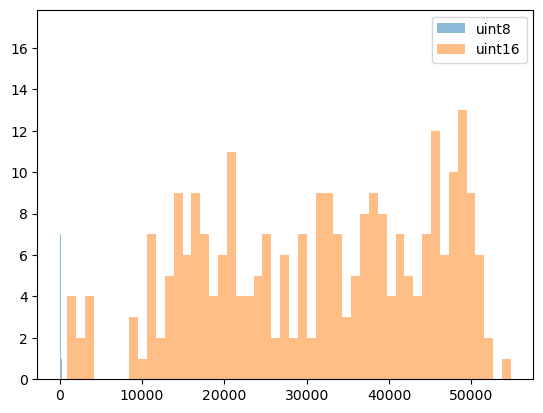

In [39]:
plt.hist(pixel_average_by_dtype['uint8-SNR'], bins=50, alpha=0.5, label='uint8')
plt.hist(pixel_average_by_dtype['uint16-SNR'], bins=50, alpha=0.5, label='uint16')
plt.legend()
pass